<a href="https://colab.research.google.com/github/x1001000/books-chinese-networkx/blob/main/Co-occurrence_network_KWIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 安裝

In [ ]:
# 安裝 CKIP 套件
! pip install ckiptagger

# 下載

In [ ]:
# 下載 CKIP 模型
from ckiptagger import data_utils
data_utils.download_data_gdown("./")    # Google Drive 載點（有時無法下載）
#data_utils.download_data_url("./")         # CKIP Lab 載點（較慢）

Downloading...
From: https://drive.google.com/uc?id=1efHsY16pxK0lBD2gYCgCTnv1Swstq771
To: /content/data.zip
1.88GB [00:10, 172MB/s]


In [ ]:
# 下載中文字型
! wget https://github.com/googlefonts/noto-cjk/raw/master/NotoSansCJK-Regular.ttc
# 解決 networkx 繪圖無法顯示中文的問題
! cp NotoSansCJK-Regular.ttc /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf

--2020-12-03 23:02:18--  https://github.com/googlefonts/noto-cjk/raw/master/NotoSansCJK-Regular.ttc
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/googlefonts/noto-cjk/master/NotoSansCJK-Regular.ttc [following]
--2020-12-03 23:02:18--  https://raw.githubusercontent.com/googlefonts/noto-cjk/master/NotoSansCJK-Regular.ttc
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19981104 (19M) [application/octet-stream]
Saving to: ‘NotoSansCJK-Regular.ttc’

NotoSansCJK-Regular 100%[===================>]  19.05M  88.5MB/s    in 0.2s    

2020-12-03 23:02:19 (88.5 MB/s) - ‘NotoSansCJK-Regular.ttc’ saved [1998

# 匯入

In [ ]:
# 匯入斷詞、詞性標記、命名實體識別的三個工具
from ckiptagger import WS, POS, NER
ws = WS("./data")
pos = POS("./data")
ner = NER("./data")

In [ ]:
# 匯入其餘套件
import re
import itertools
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from scipy.spatial import distance
import networkx as nx

# 斷詞統計、共現網路、關鍵詞索引

In [ ]:
#@title 在左側面板上傳語料csv檔
語料檔名 = "語料.csv" #@param {type:"string"}
分析欄位 = "contents" #@param {type:"string"}
字詞出現次數大於 =  10#@param {type:"integer"}

In [ ]:
# 變數名稱設為 titles，方便直接沿用之前的程式碼
titles = []
for title in pd.read_csv(語料檔名)[分析欄位]:
    titles.append(title)
titles

['我，其實很不擅長向他人傳達事物',
 '追根究柢，為了「傳達」該要思考的事情?簡報精不精采不重要，「說動人最重要」',
 '「傳達」事情的基本事項',
 '用一分鐘說完?創造能讓左腦理解的邏輯',
 '為了不讓對方迷路「簡潔、簡單」說明',
 '用一分鐘引起他人興趣：刺激聽者右腦讓他產生想像',
 '用一分鐘說動聽者',
 '先知道「傳達事情」的模式',
 '實踐篇',
 '0',
 '為什麼你總是在談判中吃鱉?',
 '談判所言為何？',
 '在談判中無往不利的16個基本戰略',
 '佯裝自己毫無欲望',
 '戰勝談判破局的恐懼',
 '主張要言之有物',
 '降低對手的期望值',
 '巧妙地呼嚨對手',
 '有效地威嚇對方',
 '使對方心急如焚',
 '側耳傾聽對方的心聲',
 '感同身受的表現',
 '提供協助',
 '由我方提出「妥協條件」',
 '拉抬自己的讓步條件',
 '逐步獻出妥協方案',
 '?對談判結果貪得無厭',
 '尋找第三條路',
 '只用郵件談判時要更加小心謹慎',
 '百戰百勝的談判確認清單',
 '0',
 '為什麼就是沒辦法好好說明呢？~理由有三個~',
 '因為沒有用「動作」表達出來',
 '因為「數目」增加太多',
 '因為想要「涵蓋一切」',
 '「一聽就懂的說明」條件為何？~要點有三個~',
 '數目鎖定在「三個」',
 '套用說明的「結構」',
 '以「動作」表達',
 '怎麼做才能變成擅長說明呢？~方法有三個~',
 '以「三個觀點」整理資訊',
 '以「三個結構」歸納論述',
 '以「三個動作」傳達出去',
 '0',
 '加強議論能力的秘訣是什麼？',
 '為什麼我們需要「邏輯能力」？',
 '為了不要輸給對方的不合理主張',
 '其實跟「到底正不正確」沒關係！',
 '每個人都是憑藉自己的價值觀而活',
 '不要得理不饒人',
 '不是講?對方就好',
 '所有的議論都是為了獲得「更好的結論',
 '該怎麼讓對方心服口服',
 '三段式論證 「若A則B、若B則C、因此若A則C」',
 '刨根究柢論證法 「規則→事實→結論」',
 '原則與例外 「基本上是黑，有時候也會是白。」',
 '公知事實 「沒有必要無止盡奉陪對方的『為什?？』」',
 '爭點整理 「我們先搞清楚問題到底在哪裡。」',
 '拒之門外 「你

In [ ]:
# 分析使用的詞類
pos_to_keep = [
    'A',
    'N',
    'Nv',
    'Vi',
    'Vt',
    'FW',]

In [ ]:
# 詞類對應 http://ckipsvr.iis.sinica.edu.tw/cat.htm
table = '''
A	A
Caa	C
Cab	POST
Cba	POST
Cbb	C
D	ADV
DE	T
Da	ADV
Dfa	ADV
Dfb	ADV
Di	ASP
Dk	ADV
FW	FW
I	T
Na	N
Nb	N
Nc	N
Ncd	N
Nd	N
Nep	DET
Neqa	DET
Neqb	POST
Nes	DET
Neu	DET
Nf	M
Ng	POST
Nh	N
Nv	Nv
P	P
SHI	Vt
T	T
VA	Vi
VAC	Vt
VB	Vi
VC	Vt
VCL	Vt
VD	Vt
VE	Vt
VF	Vt
VG	Vt
VH	Vi
VHC	Vt
VI	Vi
VJ	Vt
VK	Vt
VL	Vt
V_2	Vt'''

pos_reduced = {}
for k_v in table.strip().split('\n'):
    k,v = k_v.split()
    pos_reduced[k] = v

In [ ]:
# CKIP斷詞，若非分析使用的詞類，則出現次數歸零，統計字詞出現次數
term_count = {}
ws_of_titles = ws(titles)
pos_of_titles = pos(ws_of_titles)
for ws_of_title, pos_of_title in zip(ws_of_titles, pos_of_titles):
    for w, p in zip(ws_of_title, pos_of_title):
        if f'{w}({p})' not in term_count:
            term_count[f'{w}({p})'] = 1
        else:
            term_count[f'{w}({p})'] += 1
for term in term_count:
    term_pos = re.search(r'\((.+)\)', term).group(1)
    if term_pos not in pos_reduced:
        term_count[term] = 0
    elif pos_reduced[term_pos] not in pos_to_keep:
        term_count[term] = 0
term_count_df = pd.DataFrame({'字詞': [term for term in term_count], '出現次數': [count for count in term_count.values()]})
term_count_df

,字詞,出現次數
0,我(Nh),29
1,，(COMMACATEGORY),0
2,其實(D),0
3,很(Dfa),0
4,不(D),0
...,...,...
2471,尖酸(VH),1
2472,言語(Na),1
2473,術(Na),1
2474,凡(Cbb),0


In [ ]:
term_count_df[term_count_df['出現次數'] > 0].sort_values(by='出現次數', ascending=False)

,字詞,出現次數
62,你(Nh),126
35,讓(VL),105
39,對方(Nh),95
187,人(Na),66
649,溝通(VC),62
...,...,...
1224,服膺(VC),1
1223,糟糕(VH),1
1222,脫離(VC),1
1221,乾淨(VH),1


In [ ]:
## 統計
#term_count_df[['出現次數']].describe()

In [ ]:
df = term_count_df[term_count_df['出現次數'] > 字詞出現次數大於].sort_values(by='出現次數', ascending=False)
print(f'出現次數大於 {字詞出現次數大於} 的字詞有 {len(df)} 個')

出現次數大於 10 的字詞有 46 個


In [ ]:
fig = px.bar(df, color='出現次數', color_continuous_scale=px.colors.sequential.Viridis, x='字詞', y='出現次數')
fig.show()

In [ ]:
vocab    = dict(zip(df['字詞'], range(len(df))))
re_vocab = dict(zip(range(len(df)), df['字詞']))#list(df['字詞'])
assert len(df) == len(vocab) == len(re_vocab)

In [ ]:
C_ws_of_titles = [list(itertools.combinations(title, 2)) for title in ws_of_titles]
C_pos_of_titles = [list(itertools.combinations(title, 2)) for title in pos_of_titles]
cooccurrence_matrix = np.zeros((len(df), len(df)))
for C_ws_of_title, C_pos_of_title in zip(C_ws_of_titles, C_pos_of_titles):
    for w, p in zip(C_ws_of_title, C_pos_of_title):
        if f'{w[0]}({p[0]})' in vocab and f'{w[1]}({p[1]})' in vocab:
            cooccurrence_matrix[vocab[f'{w[0]}({p[0]})'], vocab[f'{w[1]}({p[1]})']] += 1
            cooccurrence_matrix[vocab[f'{w[1]}({p[1]})'], vocab[f'{w[0]}({p[0]})']] += 1
for i in range(len(df)):
    cooccurrence_matrix[i, i] /= 2
cooccurrence_matrix

array([[ 7., 34., 11., ...,  2.,  2.,  5.],
       [34.,  3., 38., ...,  1.,  1.,  0.],
       [11., 38.,  9., ...,  5.,  2.,  0.],
       ...,
       [ 2.,  1.,  5., ...,  0.,  0.,  0.],
       [ 2.,  1.,  2., ...,  0.,  0.,  1.],
       [ 5.,  0.,  0., ...,  0.,  1.,  0.]])

In [ ]:
jaccard_matrix = 1 - distance.cdist(cooccurrence_matrix, cooccurrence_matrix, 'jaccard')
jaccard_matrix

array([[1.        , 0.20930233, 0.09302326, ..., 0.02380952, 0.06976744,
        0.        ],
       [0.20930233, 1.        , 0.11904762, ..., 0.        , 0.07142857,
        0.075     ],
       [0.09302326, 0.11904762, 1.        , ..., 0.05882353, 0.02702703,
        0.11111111],
       ...,
       [0.02380952, 0.        , 0.05882353, ..., 1.        , 0.15789474,
        0.1       ],
       [0.06976744, 0.07142857, 0.02702703, ..., 0.15789474, 1.        ,
        0.        ],
       [0.        , 0.075     , 0.11111111, ..., 0.1       , 0.        ,
        1.        ]])

In [ ]:
pairs = []
edges = []
for i in range(len(df)):
    for j in range(i+1, len(df)):
        #jaccard = jaccard_matrix[i, j]
        #if jaccard > 0:
        #    pairs.append([re_vocab[i], re_vocab[j], term_count[re_vocab[i]], term_count[re_vocab[j]], jaccard])
        cooccurrence = cooccurrence_matrix[i,j]
        pairs.append([re_vocab[i], re_vocab[j], term_count[re_vocab[i]], term_count[re_vocab[j]], cooccurrence])
        if cooccurrence > 0:
            edges.append([re_vocab[i], re_vocab[j], term_count[re_vocab[i]], term_count[re_vocab[j]], cooccurrence])
print(f'{len(df)} 個點（高頻詞），若兩兩相連應有 {len(pairs)} 條線，但實際只有 {len(edges)} 條線（兩高頻詞共現一次以上）')

46 個點（高頻詞），若兩兩相連應有 1035 條線，但實際只有 418 條線（兩高頻詞共現一次以上）


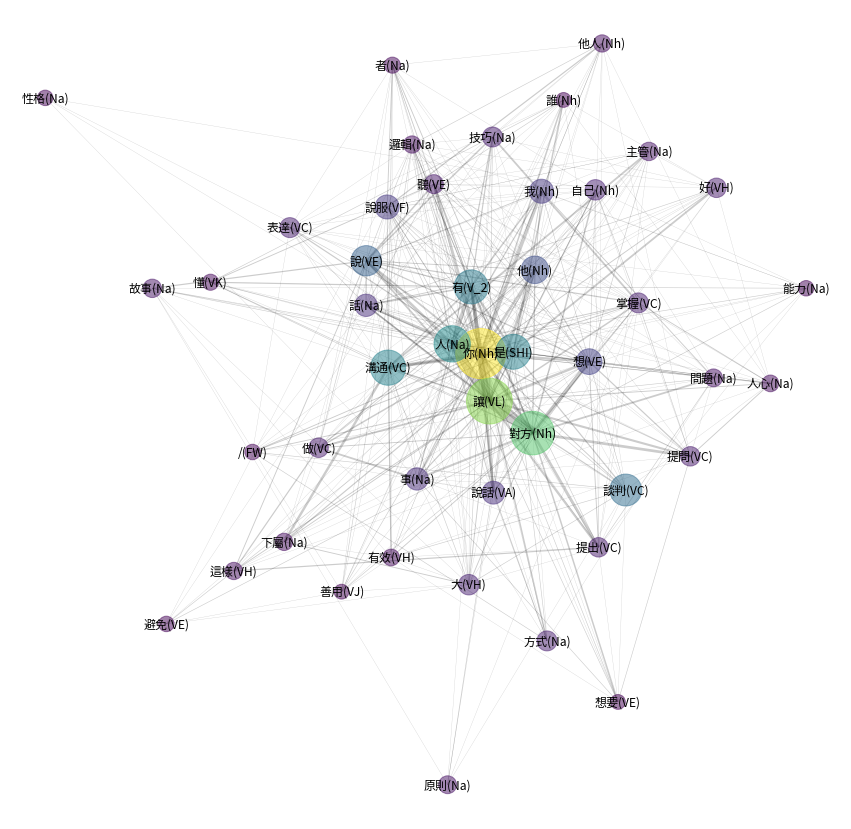

In [ ]:
G = nx.Graph()
G.nodes(data=True)

for pair in pairs:
#for pair in edges:
    node_x, node_y, node_x_cnt, node_y_cnt, jaccard = pair#[0], pair[1], pair[2], pair[3], pair[4]
    if not G.has_node(node_x):
        G.add_node(node_x, count=node_x_cnt)
    if not G.has_node(node_y):
        G.add_node(node_y, count=node_y_cnt)
    if not G.has_edge(node_x, node_y):
        G.add_edge(node_x, node_y, weight=jaccard)
    #else:
    #    print(pair)
        
plt.figure(figsize=(15,15))
_pos = nx.spring_layout(G, k=1.5)

node_size = [d['count']*20 for (n,d) in G.nodes(data=True)]
nx.draw_networkx_nodes(G, _pos, node_size=node_size, node_color=node_size, alpha=0.5)
nx.draw_networkx_labels(G, _pos)#, fontsize=14, font_family='Droid Sans Japanese')

edge_width = [d['weight']*0.3 for (u,v,d) in G.edges(data=True)]
nx.draw_networkx_edges(G, _pos, alpha=0.2, edge_color='black', width=edge_width)

plt.axis('off')
plt.show()

In [ ]:
cooccurrence_table = pd.DataFrame(pairs, columns=['詞1','詞2','詞1出現次數','詞2出現次數','共現次數'])
cooccurrence_table['共現次數'] = cooccurrence_table['共現次數'].astype(int)
cooccurrence_table.sort_values(by='共現次數', ascending=False).style.hide_index()
#cooccurrence_table.style.hide_index()

詞1,詞2,詞1出現次數,詞2出現次數,共現次數
讓(VL),對方(Nh),105,95,38
你(Nh),讓(VL),126,105,34
讓(VL),人(Na),105,66,29
你(Nh),是(SHI),126,61,17
你(Nh),有(V_2),126,58,13
對方(Nh),想(VE),95,33,13
人(Na),有(V_2),66,58,12
你(Nh),我(Nh),126,29,11
你(Nh),對方(Nh),126,95,11
你(Nh),人(Na),126,66,10


In [ ]:
#@title 關鍵「詞」查詢
query = "自己" #@param {type:"string"}

In [ ]:
for ws_of_title in ws_of_titles:
    if query in ws_of_title:
        concat = '　'.join(ws_of_title)
        concat = concat.replace('\n', '')
        concat = concat.replace(' ', '　')
        context = concat.split('　'+query+'　')
        for i in range(len(context)-1):
            print(context[i][-20:].rjust(20, '　') + '　'+query+'　' + context[i+1][:20])

　　　　　　　　　　　　　　　　　　佯裝　自己　毫無　欲望
　　　　　　　　　　　　　　　　　　拉抬　自己　的　讓步　條件
　　　　　　　　每　個　人　都　是　憑藉　自己　的　價值觀　而　活
　　　　　　　　　　　　掌握　對方　反對　自己　論點　的　哪裡
改善　能力　　　提出　問題　讓　對方　「　自己　發覺　」
　犯錯　等　難以　啟齒　的　事　　　　「　自己　坦承　」　的　過錯　一筆勾銷
　　　　　　　　　　　　　　使　談話　對　自己　有利　　　藉由　「　銘印　效應　」　誘導
　　　　　　　　　　　　想　讓　對方　對　自己　懷有　特殊感　或　連帶感　時　　　分享　
　　　　　　　　　　　　　　　　　　訓練　自己　學會　捨棄　，　為　聽　者　鎖定　重點　
　　　　3　、　麻煩　你　簡短　的　表達　自己　的　感覺
　　　　　　　　　　　　　讓　貓咪　以為　自己　掌握　權力　　誘餌　與　斜坡　是　最　強
　　　　　　　　　　　　　　　　　　發現　自己　是否　為　電腦　模擬　物種
　　　　　　　　　　　　知己　：　　認識　自己　的　顏色　性格
　　　讓　他　取得　優先　順位　，　說出　自己　完整　的　想法
　　　　　　　　　　　　　　　　　　分享　自己　的　經驗
　　　　　　　　　　　　期待　對方　給予　自己　協助
　　　　　　　　　　　　　　　　　先　給　自己　一點　時間　再　回應
　　　　　　　　　　　　　　　　　　　別　自己　悶著　，　試　著　說出　心　裡　的　感受
　　　　　　　　　　　　　別　只　顧　著　自己　說
　　　　　　　　　　　　　　　別　合理化　自己　的　行為
